In [160]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm


In [135]:
RawData = pd.read_csv('insurance_dataset.csv')
Data = RawData.copy() 

### Section 1: Exploratory data analysis 

In [136]:
#How many records are populated in the dataset

print('Total number of records in the dataset is',Data.shape[0])
print('Total number of attributes in the dataset is',Data.shape[1])

Total number of records in the dataset is 1000
Total number of attributes in the dataset is 5


In [137]:
#Check any missing value 

Data.isnull().sum()

Catastrophic_Event    0
Insurance_Claims      0
Location              0
Building_Structure    0
Insured_Value         0
dtype: int64

In [138]:
#Check Data type of each column 

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Catastrophic_Event  1000 non-null   object
 1   Insurance_Claims    1000 non-null   int64 
 2   Location            1000 non-null   object
 3   Building_Structure  1000 non-null   object
 4   Insured_Value       1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [139]:
# Display the dataset 

Data.head(10)

,Catastrophic_Event,Insurance_Claims,Location,Building_Structure,Insured_Value
0,Earthquake,146586,Urban,Concrete,171958
1,Hurricane,91231,Suburban,Wood,196867
2,Earthquake,97368,Suburban,Concrete,181932
3,Fire,183852,Suburban,Steel,415838
4,Flood,97186,Rural,Wood,309178
5,Hurricane,54826,Suburban,Concrete,169879
6,Flood,-10831,Urban,Concrete,160268
7,Fire,174676,Urban,Wood,257892
8,Fire,-56301,Rural,Steel,104886
9,Earthquake,195275,Rural,Concrete,187337


In [140]:
# # Group data by location and calculate the total insured value

TIV = Data.groupby('Location')['Insured_Value'].sum()
TIV_Building_Type = Data.groupby('Building_Structure')['Insured_Value'].sum() 

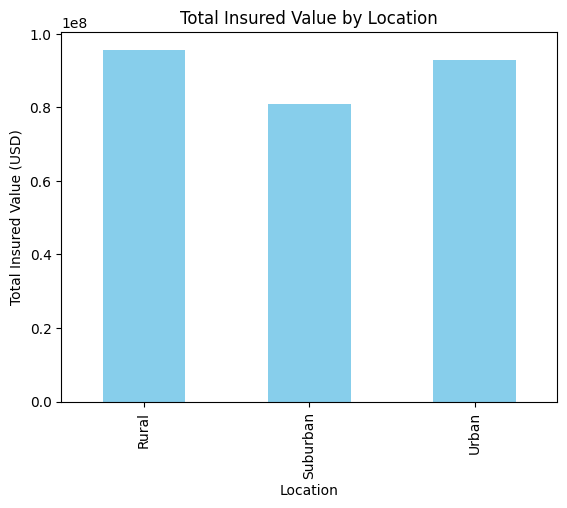

In [141]:
TIV.plot(kind='bar', color='skyblue')
plt.title('Total Insured Value by Location')
plt.xlabel('Location')
plt.ylabel('Total Insured Value (USD)')
plt.show()

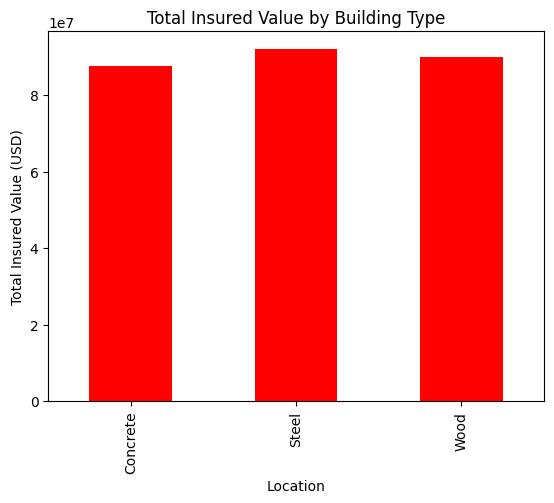

In [142]:
TIV_Building_Type.plot(kind='bar', color='red')
plt.title('Total Insured Value by Building Type')
plt.xlabel('Location')
plt.ylabel('Total Insured Value (USD)')
plt.show()

### Section 2: Selection process

C:\Users\DevendiranDi\AppData\Local\anaconda3_Version2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


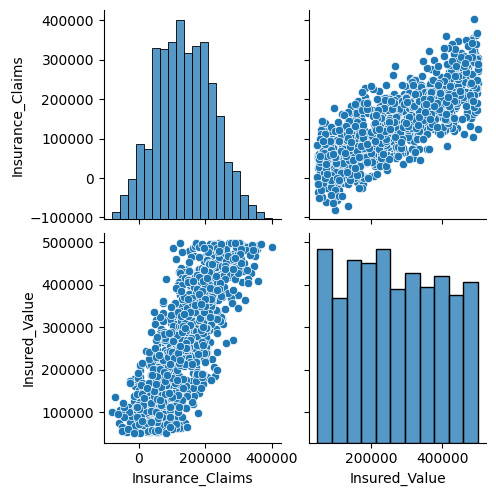

In [152]:
sns.pairplot(Data)

In [143]:
# Select relevant features (independent variables) and the target variable (insurance premiums)
features = Data[['Catastrophic_Event', 'Location', 'Building_Structure']]
target = Data['Insurance_Claims']

In [144]:
# Convert categorical variables to numerical using one-hot encoding

features_encoded = pd.get_dummies(features, drop_first=True)

In [145]:
features_encoded.head(10)

,Catastrophic_Event_Fire,Catastrophic_Event_Flood,Catastrophic_Event_Hurricane,Location_Suburban,Location_Urban,Building_Structure_Steel,Building_Structure_Wood
0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,1
2,0,0,0,1,0,0,0
3,1,0,0,1,0,1,0
4,0,1,0,0,0,0,1
5,0,0,1,1,0,0,0
6,0,1,0,0,1,0,0
7,1,0,0,0,1,0,1
8,1,0,0,0,0,1,0
9,0,0,0,0,0,0,0


In [146]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.25, random_state=42)

### Section 3: Build a regression model

In [147]:
# Build the multiple linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [148]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [149]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 6193888096.59
R-squared: -0.03


In [153]:
# Interpret the coefficients

coefficients = pd.DataFrame({'Variable': features_encoded.columns, 'Coefficient': model.coef_})
print(coefficients)

                       Variable   Coefficient
0       Catastrophic_Event_Fire   -897.364053
1      Catastrophic_Event_Flood    300.387391
2  Catastrophic_Event_Hurricane  -5159.470501
3             Location_Suburban  -7826.029529
4                Location_Urban  -7019.536988
5      Building_Structure_Steel    998.877171
6       Building_Structure_Wood  12867.041828


In [155]:
print('The intercept of the model is', model.intercept_)

The intercept of the model is 136547.7404772703


### Section 4: Check model assumption

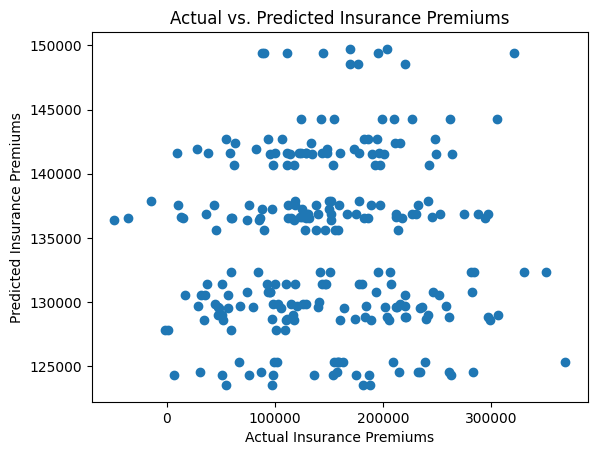

In [154]:
# Visualize the predicted vs. actual values

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Insurance Premiums')
plt.ylabel('Predicted Insurance Premiums')
plt.title('Actual vs. Predicted Insurance Premiums')
plt.show()

C:\Users\DevendiranDi\AppData\Local\anaconda3_Version2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


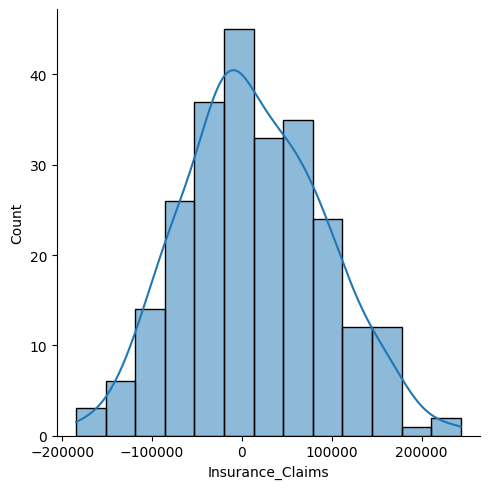

In [157]:
Residuals = y_test - y_pred  
sns.displot(Residuals, kde=True)

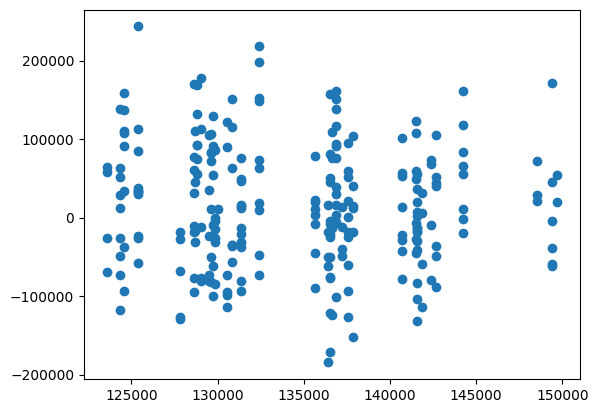

In [158]:
plt.scatter(y_pred,Residuals)

In [162]:
# OLS model 

Model = sm.OLS(y_train,X_train).fit()

Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Insurance_Claims   R-squared (uncentered):                   0.619
Model:                            OLS   Adj. R-squared (uncentered):              0.616
Method:                 Least Squares   F-statistic:                              172.6
Date:                Thu, 28 Dec 2023   Prob (F-statistic):                   3.90e-151
Time:                        00:07:33   Log-Likelihood:                         -9692.1
No. Observations:                 750   AIC:                                  1.940e+04
Df Residuals:                     743   BIC:                                  1.943e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Catastrophic_Event_Fire       6.597e+04   9036.753      7.301      0.000    4.82e+04    8.37e+04
Catastrophic_Event_Flood      6.583e+04   8992.834      7.320      0.000    4.82e+04    8.35e+04
Catastrophic_Event_Hurricane  5.975e+04   8953.079      6.674      0.000    4.22e+04    7.73e+04
Location_Suburban             4.624e+04   8190.000      5.646      0.000    3.02e+04    6.23e+04
Location_Urban                4.395e+04   7895.747      5.567      0.000    2.85e+04    5.95e+04
Building_Structure_Steel      5.316e+04   8024.260      6.624      0.000    3.74e+04    6.89e+04
Building_Structure_Wood       6.388e+04   8052.344      7.933      0.000    4.81e+04    7.97e+04
==============================================================================
Omnibus:                        7.303   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.204
Skew:                           0.060   Prob(JB):                       0.0741
Kurtosis:                       2.610   Cond. No.                         3.18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Section 5: Conclusion


Finally, the assumptions such as Linearity, Independence of Residuals, Homoscedasticity, Normality of Residuals are checks to ensure that the model meets certain criteria. 

The mathematical relation to predict the insurance claims by given location, building type and exposure is given as 


Insurance_Claims = 136547.74 + (-897.364053 * Catastrophic_Event_Fire + 300.38 * Catastrophic_Event_Flood - 5159.47 * Catastrophic_Event_Hurricane - 7826.03 * Location_Suburban - 7019.54 * Location_Urban + 998.88 * Building_Structure_Steel + 12867.04 * Building_Structure_Wood) 

